In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import os
import string
import csv

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import missingno
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.subplots
import plotly.graph_objects as go

# Model prediction
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import backend, models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
df = pd.read_csv('houston_data_07102020.csv', 
                    header = 0, 
                    error_bad_lines=False,
                    engine='python')

pd.set_option('display.max_columns', None)   

## EDA, Data cleaning, preparation and processing

In [3]:
df.head()

STATION                                     NAME  LATITUDE  LONGITUDE  \
0  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   
1  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   
2  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   
3  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   
4  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   

   ELEVATION      DATE   AWND  DAPR  EVAP  MDPR  PGTM  PRCP  RAIN  SNOW  SNWD  \
0         29  1/1/2016  12.53   NaN   NaN   NaN   NaN  0.00     0   0.0   0.0   
1         29  1/2/2016   6.49   NaN   NaN   NaN   NaN  0.00     0   0.0   0.0   
2         29  1/3/2016   5.59   NaN   NaN   NaN   NaN  0.07     1   0.0   0.0   
3         29  1/4/2016   4.92   NaN   NaN   NaN   NaN  0.00     0   0.0   0.0   
4         29  1/5/2016   6.71   NaN   NaN   NaN   NaN  0.00     0   0.0   0.0   

   TAVG  TMAX  TMIN  TOBS  WDF2   WDF5  WESD  WESF  WSF2  WSF5  WT01  WT02  \
0    48    51    45   NaN    30   30.0   NaN   NaN  21.0  29.1   NaN   NaN   
1    47    51    45   NaN    10  360.0   NaN   NaN  14.1  16.1   NaN   NaN   
2    49    62    43   NaN   310  310.0   NaN   NaN  12.1  16.1   NaN   NaN   
3    49    62    38   NaN    30   20.0   NaN   NaN  10.1  14.1   NaN   NaN   
4    45    55    34   NaN    80   80.0   NaN   NaN  14.1  18.1   NaN   NaN   

   WT03  WT04  WT05  WT06  WT08  WT10  WT11  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [4]:
df.tail()

STATION                                     NAME  LATITUDE  \
1647  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1648  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1649  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1650  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1651  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   

      LONGITUDE  ELEVATION      DATE  AWND  DAPR  EVAP  MDPR    PGTM  PRCP  \
1647     -95.36         29  7/5/2020  5.82   NaN   NaN   NaN     NaN  0.00   
1648     -95.36         29  7/6/2020  6.04   NaN   NaN   NaN     NaN  0.00   
1649     -95.36         29  7/7/2020  5.59   NaN   NaN   NaN     NaN  0.56   
1650     -95.36         29  7/8/2020  7.61   NaN   NaN   NaN     NaN  0.00   
1651     -95.36         29  7/9/2020  9.62   NaN   NaN   NaN  1456.0  0.00   

      RAIN  SNOW  SNWD  TAVG  TMAX  TMIN  TOBS  WDF2   WDF5  WESD  WESF  WSF2  \
1647     0   0.0   0.0    86    96    79   NaN   220  230.0   NaN   NaN  14.1   
1648     0   0.0   0.0    86    91    82   NaN   260  250.0   NaN   NaN  15.0   
1649     1   0.0   0.0    86    94    80   NaN   350  190.0   NaN   NaN  19.9   
1650     0   0.0   0.0    87    96    82   NaN   150  180.0   NaN   NaN  14.1   
1651     0   0.0   0.0    88    98    82   NaN   160  150.0   NaN   NaN  18.1   

      WSF5  WT01  WT02  WT03  WT04  WT05  WT06  WT08  WT10  WT11  
1647  19.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1648  21.9   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
1649  23.9   1.0   NaN   1.0   NaN   NaN   NaN   1.0   NaN   NaN  
1650  19.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1651  23.9   1.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 34 columns):
STATION      1652 non-null object
NAME         1652 non-null object
LATITUDE     1652 non-null float64
LONGITUDE    1652 non-null float64
ELEVATION    1652 non-null int64
DATE         1652 non-null object
AWND         1652 non-null float64
DAPR         0 non-null float64
EVAP         0 non-null float64
MDPR         0 non-null float64
PGTM         22 non-null float64
PRCP         1652 non-null float64
RAIN         1652 non-null int64
SNOW         1652 non-null float64
SNWD         1652 non-null float64
TAVG         1652 non-null int64
TMAX         1652 non-null int64
TMIN         1652 non-null int64
TOBS         0 non-null float64
WDF2         1652 non-null int64
WDF5         1639 non-null float64
WESD         0 non-null float64
WESF         0 non-null float64
WSF2         1652 non-null float64
WSF5         1639 non-null float64
WT01         745 non-null float64
WT02         120 no

In [6]:
for col in df.columns:
    print(col)

STATION
NAME
LATITUDE
LONGITUDE
ELEVATION
DATE
AWND
DAPR
EVAP
MDPR
PGTM
PRCP
RAIN
SNOW
SNWD
TAVG
TMAX
TMIN
TOBS
WDF2
WDF5
WESD
WESF
WSF2
WSF5
WT01
WT02
WT03
WT04
WT05
WT06
WT08
WT10
WT11


In [7]:
df.rename(columns = {'AWND': 'WINDAVG',
                     'PRCP': 'PRECIPITATION',
                     'TAVG': 'TEMPAVG_F', 
                     'TMAX': 'TEMPMAX_F', 
                     'TMIN': 'TEMPMIN_F'}, inplace=True)

In [8]:
print(df)

          STATION                                     NAME  LATITUDE  \
0     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
2     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
3     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
4     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
...           ...                                      ...       ...   
1647  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1648  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1649  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1650  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1651  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   

      LONGITUDE  ELEVATION      DATE  WINDAVG  DAPR  EVAP  MDPR    PGTM  \
0        -95.36         29  1/1/2016    12.53   NaN   NaN   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 34 columns):
STATION          1652 non-null object
NAME             1652 non-null object
LATITUDE         1652 non-null float64
LONGITUDE        1652 non-null float64
ELEVATION        1652 non-null int64
DATE             1652 non-null object
WINDAVG          1652 non-null float64
DAPR             0 non-null float64
EVAP             0 non-null float64
MDPR             0 non-null float64
PGTM             22 non-null float64
PRECIPITATION    1652 non-null float64
RAIN             1652 non-null int64
SNOW             1652 non-null float64
SNWD             1652 non-null float64
TEMPAVG_F        1652 non-null int64
TEMPMAX_F        1652 non-null int64
TEMPMIN_F        1652 non-null int64
TOBS             0 non-null float64
WDF2             1652 non-null int64
WDF5             1639 non-null float64
WESD             0 non-null float64
WESF             0 non-null float64
WSF2             1652 non-null 

In [10]:
df.describe()

LATITUDE     LONGITUDE  ELEVATION      WINDAVG  DAPR  EVAP  MDPR  \
count  1.652000e+03  1.652000e+03     1652.0  1652.000000   0.0   0.0   0.0   
mean   2.998000e+01 -9.536000e+01       29.0     7.690079   NaN   NaN   NaN   
std    8.315867e-13  1.904831e-12        0.0     3.065759   NaN   NaN   NaN   
min    2.998000e+01 -9.536000e+01       29.0     1.340000   NaN   NaN   NaN   
25%    2.998000e+01 -9.536000e+01       29.0     5.590000   NaN   NaN   NaN   
50%    2.998000e+01 -9.536000e+01       29.0     7.160000   NaN   NaN   NaN   
75%    2.998000e+01 -9.536000e+01       29.0     9.400000   NaN   NaN   NaN   
max    2.998000e+01 -9.536000e+01       29.0    23.490000   NaN   NaN   NaN   

              PGTM  PRECIPITATION         RAIN         SNOW         SNWD  \
count    22.000000    1652.000000  1652.000000  1652.000000  1652.000000   
mean   1369.500000       0.164122     0.303874     0.000484     0.000726   
std     570.796832       0.692653     0.460068     0.015163     0.029524   
min      24.000000       0.000000     0.000000     0.000000     0.000000   
25%    1142.750000       0.000000     0.000000     0.000000     0.000000   
50%    1341.000000       0.000000     0.000000     0.000000     0.000000   
75%    1703.750000       0.020000     1.000000     0.000000     0.000000   
max    2338.000000      16.070000     1.000000     0.600000     1.200000   

         TEMPAVG_F    TEMPMAX_F    TEMPMIN_F  TOBS         WDF2         WDF5  \
count  1652.000000  1652.000000  1652.000000   0.0  1652.000000  1639.000000   
mean     70.683414    80.921308    61.582930   NaN   166.307506   161.494814   
std      12.453947    12.655616    13.624799   NaN    97.167878    94.240223   
min      27.000000    34.000000    19.000000   NaN    10.000000    10.000000   
25%      62.000000    73.000000    50.000000   NaN   120.000000   110.000000   
50%      73.000000    83.000000    65.000000   NaN   150.000000   150.000000   
75%      81.000000    91.000000    74.000000   NaN   210.000000   200.000000   
max      90.000000   103.000000    83.000000   NaN   360.000000   360.000000   

       WESD  WESF         WSF2         WSF5   WT01   WT02   WT03  WT04  WT05  \
count   0.0   0.0  1652.000000  1639.000000  745.0  120.0  344.0   6.0   5.0   
mean    NaN   NaN    18.907385    24.386150    1.0    1.0    1.0   1.0   1.0   
std     NaN   NaN     5.296391     6.842355    0.0    0.0    0.0   0.0   0.0   
min     NaN   NaN     6.900000     8.900000    1.0    1.0    1.0   1.0   1.0   
25%     NaN   NaN    15.000000    19.900000    1.0    1.0    1.0   1.0   1.0   
50%     NaN   NaN    18.100000    23.900000    1.0    1.0    1.0   1.0   1.0   
75%     NaN   NaN    21.900000    28.000000    1.0    1.0    1.0   1.0   1.0   
max     NaN   NaN    46.100000    57.900000    1.0    1.0    1.0   1.0   1.0   

       WT06   WT08  WT10  WT11  
count   1.0  168.0   0.0   0.0  
mean    1.0    1.0   NaN   NaN  
std     NaN    0.0   NaN   NaN  
min     1.0    1.0   NaN   NaN  
25%     1.0    1.0   NaN   NaN  
50%     1.0    1.0   NaN   NaN  
75%     1.0    1.0   NaN   NaN  
max     1.0    1.0   NaN   NaN

## Data Cleaning

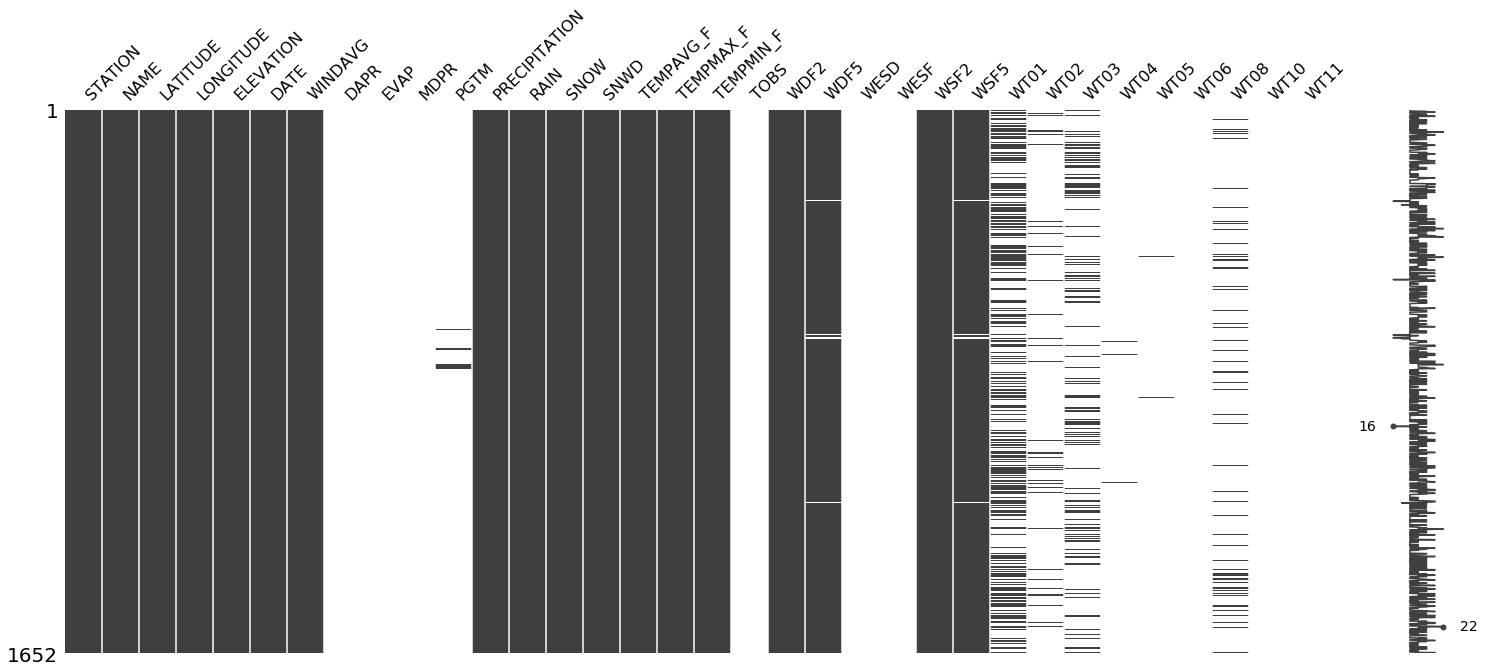

In [11]:
# Visualizing missing data with “missingno” package

missingno.matrix(df)

#### The white horizontal lines in each column represent the null values. Based on the above visualization, many columns have missing values. These columns can be dropped.

### Removing the null columns

In [12]:
# Drop the unuse columns + columns with null values

df1 = df.drop(['DAPR', 'EVAP', 'MDPR', 'PGTM', 'SNOW', 'SNWD', 'TOBS', 
               'WDF2', 'WDF5', 'WESD', 'WESF', 'WSF2', 'WSF5', 'WT01',
               'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT10',
               'WT11'], axis=1)

In [13]:
df1.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'WINDAVG', 'PRECIPITATION', 'RAIN', 'TEMPAVG_F', 'TEMPMAX_F',
       'TEMPMIN_F'],
      dtype='object')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 12 columns):
STATION          1652 non-null object
NAME             1652 non-null object
LATITUDE         1652 non-null float64
LONGITUDE        1652 non-null float64
ELEVATION        1652 non-null int64
DATE             1652 non-null object
WINDAVG          1652 non-null float64
PRECIPITATION    1652 non-null float64
RAIN             1652 non-null int64
TEMPAVG_F        1652 non-null int64
TEMPMAX_F        1652 non-null int64
TEMPMIN_F        1652 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 155.0+ KB


In [15]:
print(df1)

          STATION                                     NAME  LATITUDE  \
0     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
2     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
3     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
4     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
...           ...                                      ...       ...   
1647  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1648  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1649  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1650  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1651  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   

      LONGITUDE  ELEVATION      DATE  WINDAVG  PRECIPITATION  RAIN  TEMPAVG_F  \
0        -95.36         29  1/1/2016    12.53         

In [16]:
df1.describe()

LATITUDE     LONGITUDE  ELEVATION      WINDAVG  PRECIPITATION  \
count  1.652000e+03  1.652000e+03     1652.0  1652.000000    1652.000000   
mean   2.998000e+01 -9.536000e+01       29.0     7.690079       0.164122   
std    8.315867e-13  1.904831e-12        0.0     3.065759       0.692653   
min    2.998000e+01 -9.536000e+01       29.0     1.340000       0.000000   
25%    2.998000e+01 -9.536000e+01       29.0     5.590000       0.000000   
50%    2.998000e+01 -9.536000e+01       29.0     7.160000       0.000000   
75%    2.998000e+01 -9.536000e+01       29.0     9.400000       0.020000   
max    2.998000e+01 -9.536000e+01       29.0    23.490000      16.070000   

              RAIN    TEMPAVG_F    TEMPMAX_F    TEMPMIN_F  
count  1652.000000  1652.000000  1652.000000  1652.000000  
mean      0.303874    70.683414    80.921308    61.582930  
std       0.460068    12.453947    12.655616    13.624799  
min       0.000000    27.000000    34.000000    19.000000  
25%       0.000000    62.000000    73.000000    50.000000  
50%       0.000000    73.000000    83.000000    65.000000  
75%       1.000000    81.000000    91.000000    74.000000  
max       1.000000    90.000000   103.000000    83.000000

## Visualizing the weather data

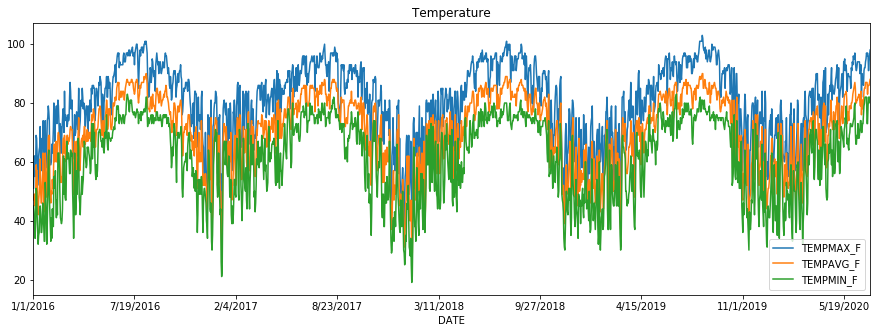

In [17]:
# Timeline plot of the daily temperatures

df1.plot(x='DATE', y=['TEMPMAX_F', 'TEMPAVG_F', 'TEMPMIN_F'], figsize=(15,5), 
        title='Temperature')

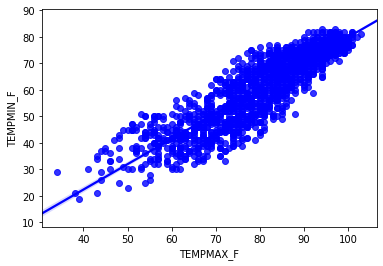

In [18]:
# Scatter plot between the min and max temperatures

sns.regplot(x = 'TEMPMAX_F', y = 'TEMPMIN_F', color="b", data = df1)

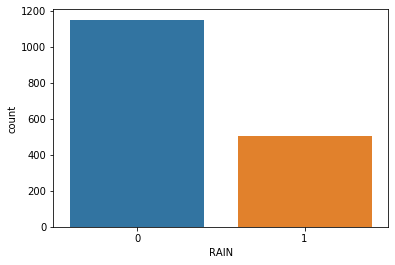

In [19]:
# Plot the Rain column (0 = no rain, 1 = rain)

sns.countplot(data = df1, x='RAIN')

#### From the above figure, 0 = No Rain and 1 = Rain

In [20]:
# Visualing the Precipitation

fig = go.Figure(data=[go.Scatter(x=df1['DATE'], y=df1['PRECIPITATION'])],
                layout=go.Layout(title=go.layout.Title(text='Precipitation - Rain in Inches')))

fig.show()

#### As shown on the plot, the highest one day precipitation (rainfall): 16.07 inches - August 27, 2017

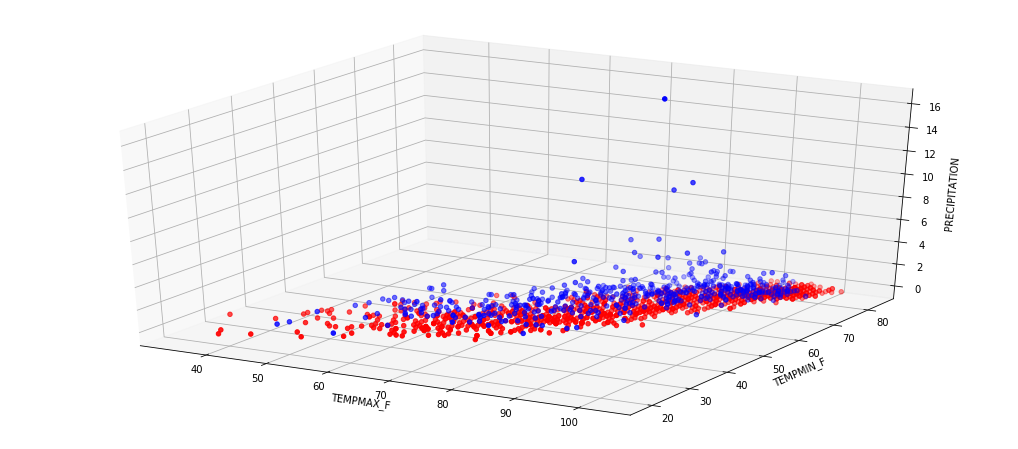

In [21]:
# 3D plot visualization of the weather condition

df1_plot = df1[['PRECIPITATION','TEMPMAX_F','TEMPMIN_F','RAIN']]
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('TEMPMAX_F')
ax.set_ylabel('TEMPMIN_F')
ax.set_zlabel('PRECIPITATION')
ax.scatter(df1_plot[df1_plot.RAIN == 0]['TEMPMAX_F'],
           df1_plot[df1_plot.RAIN == 0]['TEMPMIN_F'],
           df1_plot[df1.RAIN == 0]['PRECIPITATION'],marker="o",color="red")
ax.scatter(df1_plot[df1.RAIN == 1]['TEMPMAX_F'],
           df1_plot[df1.RAIN == 1]['TEMPMIN_F'],
           df1_plot[df1.RAIN == 1]['PRECIPITATION'],marker="o",color="blue");

#### As shown on the 3D plot:
##### Blue dots = It rained when the preciptation (in Inches) increased
##### Red dots = It didn't rain when the precipitation (in Inches) at low level

### Visualizing with Plotly Subpots Tracing

In [22]:
df1.loc[:,'DATE'] = pd.to_datetime(df['DATE'])

In [23]:
# Now extract year and month from datetime

df1['YEAR'] = df1['DATE'].dt.year
df1['MONTH'] = df1['DATE'].dt.month

In [24]:
df1["RAIN"].value_counts()

0    1150
1     502
Name: RAIN, dtype: int64

#### Yearly rain analysis with Precipitation

In [25]:
# Plot the yearly total rain

fig = py.subplots.make_subplots(1,2, subplot_titles=['Total Rain in Year', 
                                                     'Median rain on a rainy day of each Year'])

temp = df1.groupby(by=['YEAR'])['PRECIPITATION'].sum().reset_index()
trace0 = go.Scatter(x=temp['YEAR'], y=temp['PRECIPITATION'])

temp = df1.groupby(by=['YEAR'])['PRECIPITATION'].median().reset_index()
trace1 = go.Scatter(x=temp['YEAR'], y=temp['PRECIPITATION'])

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)

fig.show()

#### As shown on the plot, 2017 has the highest rain totals - 79.69 inches

#### Monthly rain analysis with Precipitation

In [26]:
# Plot the monthly rain

fig = py.subplots.make_subplots(1,2, subplot_titles=['Monthly Rain Totals - inches', 
                                                     'Median rain on a rainy day'])

temp = df1.groupby(by=['MONTH'])['PRECIPITATION'].sum().reset_index()
trace0 = go.Scatter(x=temp['MONTH'], y=temp['PRECIPITATION'])

temp = df1.groupby(by=['MONTH'])['PRECIPITATION'].median().reset_index()
trace1 = go.Scatter(x=temp['MONTH'], y=temp['PRECIPITATION'])

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)

fig.show()

#### As shown on the plot, August has the highest rain totals - 52.79 inches

### Visualizing with  correlation matrix

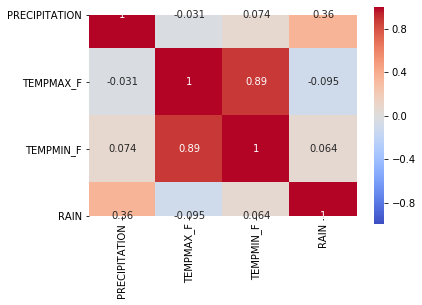

In [27]:
# Visualizing the correlation matrix as a heatmap.
weather_corr = sns.heatmap(df1_plot[["PRECIPITATION","TEMPMAX_F","TEMPMIN_F","RAIN"]].corr(),
                           vmin=-1, vmax=1, center=0,
                           annot=True, square=True, cmap = "coolwarm")

#### Red means positive, blue means negative. The stronger the color, the larger the correlation magnitude.
#### Precipitation (in inches) has a significative correlation with the Rain variable

## Build the model - Rain predictions

### From the EDA we found the precipitation (in inches) is the most important varible in deciding the rain condition in Houston.

In [28]:
df_weather = df.drop(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
                      'WINDAVG','DAPR', 'EVAP', 'MDPR', 'PGTM', 'SNOW', 'SNWD',
                      'TOBS', 'WDF2', 'WDF5', 'WESD', 'WESF', 'WSF2', 'WSF5', 
                      'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 
                      'WT10', 'WT11'], axis=1)

### Prepare data for training

In [29]:
# View data to be used for rain prediction

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 6 columns):
DATE             1652 non-null object
PRECIPITATION    1652 non-null float64
RAIN             1652 non-null int64
TEMPAVG_F        1652 non-null int64
TEMPMAX_F        1652 non-null int64
TEMPMIN_F        1652 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 77.6+ KB


### Training Dataset

In [30]:
X = df_weather.iloc[:, [1,4,5]].values
y = df_weather.iloc[:, 2].values

### Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
# Spit the data into 70% training and 30% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

### Buld a 1st model with Support Vector Classifier (SVC)
#### Training SVC model on the Training set

In [32]:
# Fitting the Classifier
from sklearn.svm import SVC

classifier_svc = SVC(gamma='auto', kernel='linear', random_state = 42)
classifier_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

### Predicting the Test set results

In [33]:
# Model prediction

prediction = classifier_svc.predict(X_test)

### Analyzing the model with Confusion Matrix and Classification Report

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, prediction)
print('Confusion Matrix:', cm)
print('Accuracy Score:', accuracy_score(y_test, prediction))
print('\n')
print('Classification Report:',classification_report(y_test, prediction))

Confusion Matrix: [[337   1]
 [ 62  96]]
Accuracy Score: 0.8729838709677419


Classification Report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91       338
           1       0.99      0.61      0.75       158

    accuracy                           0.87       496
   macro avg       0.92      0.80      0.83       496
weighted avg       0.89      0.87      0.86       496



#### The Classification Report displays the Precision, Recall, F1, and Support scores for the model.
#### The Precision for no rain is 0.84 and for rain is 0.99 
#### Recall is predict the outcome of the model - no rain is 1.00 and for rain is 0.61
#### F1 and Support Scores are the amount of data tested for predictions. In the rainfall dataset the data tested for "no rain" is 338 and for "rain" is 158.
#### Confusion Matrix is to evaluate the performance of a prediction model. It contains the actual and predicted values. We use these values to calculate the accuracy score of the model. The Accuracy Score of the model is 0.87.

In [35]:
# Printing results for the Confusion Matrix
print('The model has predicted - there will be no rain for', cm[0,0] , 'days.')
print('The model has predicted - there will be rain for', cm[1,1] , 'days.')

The model has predicted - there will be no rain for 337 days.
The model has predicted - there will be rain for 96 days.


### Visualization with Confusion Matrix heatmap

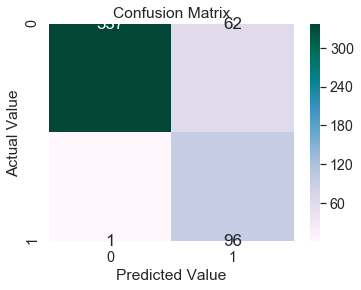

In [36]:
cm = pd.crosstab(prediction, y_test, rownames=['Actual Value'], colnames=['Predicted Value'])

plt.figure(figsize=(5.5,4))
sns.set(context='notebook', font_scale=1.3, color_codes=True, palette='deep')
sns.heatmap(cm, annot=True, annot_kws={"size": 17}, fmt='d', cmap='PuBuGn')
plt.title("Confusion Matrix")
plt.show()

#### We have predicted that there will be no rain for 337 days and there will be rain for 96 days.
#### The model also incorrectly predicts that 62 days will not have rain and 1 day have rain.

### Perform Cross Validation

In [37]:
# Analyzing our model with cross validation to see if it predicts consistently
# Using the 5-fold cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier_svc, X_train, y_train, cv=5)
scores.mean() 

0.8780107024409872

 #### From the above prediction with SVC class,  we have achieved around 88% accuracy.

### Evaluating our SVC model with ROC Curve

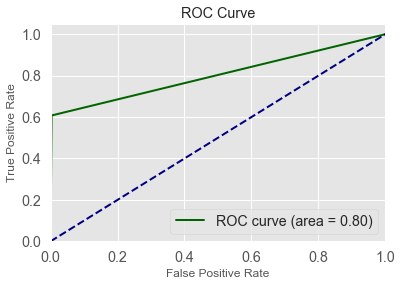

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Measure the accuracy using the ROC

fpr_svc, tpr_svc, _ = roc_curve(y_test, prediction)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure()
plt.plot(fpr_svc, tpr_svc, color='darkgreen',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### The curve lays on the top left and has a good area under the curve (AUC). Therefore, this model has performed fairly good on our test data set.

### Build a model with Logistic Regression

In [39]:
# Fitting the Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train,y_train)

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Model prediction

prediction1 = classifier_lr.predict(X_test)

In [41]:
# Analyzing our model with Confusion Matrix and Classification Report

cm = confusion_matrix(y_test, prediction1)
print(cm)
print('Accuracy Score:', accuracy_score(y_test, prediction1))
print('\n')
print(classification_report(y_test, prediction1))

[[338   0]
 [ 71  87]]
Accuracy Score: 0.8568548387096774


              precision    recall  f1-score   support

           0       0.83      1.00      0.90       338
           1       1.00      0.55      0.71       158

    accuracy                           0.86       496
   macro avg       0.91      0.78      0.81       496
weighted avg       0.88      0.86      0.84       496



#### The Precision for no rain is 0.83 and for rain is 1.00 
#### The Recall for no rain is 1.00 and for rain is 0.55
#### For this classification model, the data tested for no rain is 338 and for rain is 158.
#### The Accuracy Score of the model is 0.86
#### For the Confusion Matrix (see below)

In [42]:
# Printing results for the Confusion Matrix
print('The model has predicted - there will be no rain for', cm[0,0] , 'days.')
print('The model has predicted - there will be rain for', cm[1,1] , 'days.')

The model has predicted - there will be no rain for 338 days.
The model has predicted - there will be rain for 87 days.


### Visualization with Confusion Matrix heatmap

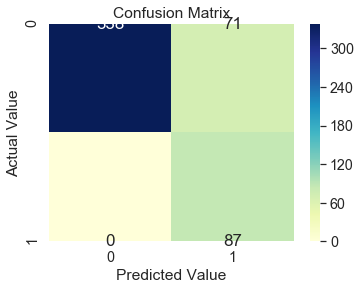

In [43]:
cm = pd.crosstab(prediction1, y_test, rownames=['Actual Value'], colnames=['Predicted Value'])

plt.figure(figsize=(5.5,4))
sns.set(context='notebook', font_scale=1.3, color_codes=True, palette='deep')
sns.heatmap(cm, annot=True,annot_kws={"size": 17}, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

#### We have predicted that there will be no rain for 338 days and rain for 87 days.
#### The model also incorrectly predicts that 71 days will not have rain.

In [44]:
# Evaluating the model with cross validation 

scores = cross_val_score(classifier_lr, X_train, y_train, cv=5)
scores.mean() 

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.8615602912829299

#### From the above prediction with Logistic Regression classifier,  we have achieved around 86%  accuracy.

### Evaluating our Logistic Regression model with ROC Curve

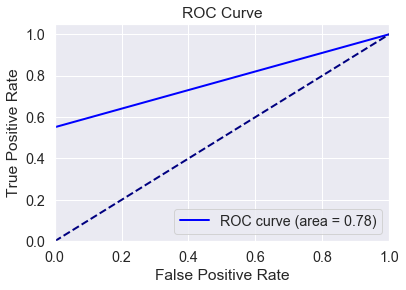

In [45]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, prediction1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### The curve (blue) lays on the top left and has a fairly good area under the curve (AUC =0.78). Therefore, this model has performed similarly good on our test data set.

### Build a model with Random Forest Classifier

In [46]:
# Fitting the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=42)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
# Model prediction

prediction2 = classifier_rf.predict(X_test)

In [48]:
# Analyzing our model with Confusion Matrix and Classification Report

cm = confusion_matrix(y_test, prediction2)
print(cm)
print('Accuracy Score:', accuracy_score(y_test, prediction2))
print('\n')
print(classification_report(y_test, prediction2))

[[337   1]
 [  0 158]]
Accuracy Score: 0.9979838709677419


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       338
           1       0.99      1.00      1.00       158

    accuracy                           1.00       496
   macro avg       1.00      1.00      1.00       496
weighted avg       1.00      1.00      1.00       496



#### The Precision for no rain is 1.00 and for rain is 0.99
#### The Recall for no rain and rain  is 1.00
#### For this classification model, the data tested for no rain is 338 and for rain is 158.
#### The Accuracy Score of the model is 1 (a perfect Accuracy Score)
#### For the Confusion Matrix (see below)

In [49]:
# Printing results for the Confusion Matrix
print('The model has predicted - there will be no rain for', cm[0,0] , 'days.')
print('The model has predicted - there will be rain for', cm[1,1] , 'days.')

The model has predicted - there will be no rain for 337 days.
The model has predicted - there will be rain for 158 days.


### Visualization with Confusion Matrix heatmap

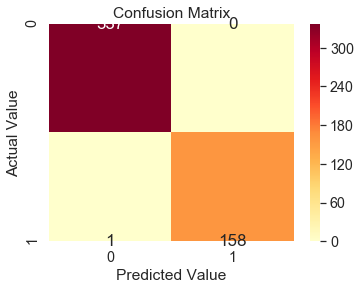

In [50]:
cm = pd.crosstab(prediction2, y_test, rownames=['Actual Value'], colnames=['Predicted Value'])

plt.figure(figsize=(5.5,4))
sns.set(context='notebook', font_scale=1.3, color_codes=True, palette='deep')
sns.heatmap(cm, annot=True,annot_kws={"size": 17}, fmt='d', cmap='YlOrRd')
plt.title("Confusion Matrix")
plt.show()

#### We have predicted that there will be no rain for 337 days and rain for 158 days.
#### The model also incorrectly predicts that 1 day have rain.

In [51]:
# Evaluation the model with cross validation 

scores = cross_val_score(classifier_rf, X_train, y_train, cv=5)
scores.mean() 

0.9991341991341992

#### From the above prediction with Random Forest classifier, we have achieved nearly 100% percent accuracy.

###  Evaluating our Random Forest model with ROC Curve

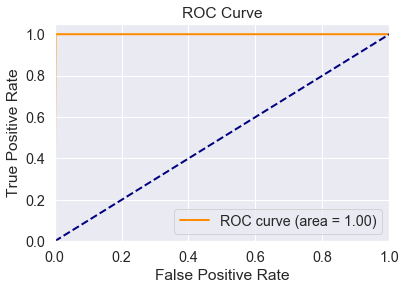

In [52]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, prediction2)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### The above ROC curve hugs the top left and has a perfect area under the curve (AUC) so this model has performed well on our test data set.

### Comparing the 3 models with ROC Curve

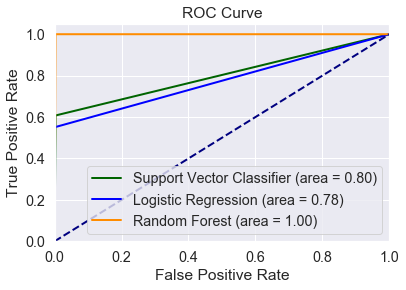

In [53]:
plt.figure()

plt.plot(fpr_svc, tpr_svc, color='darkgreen',
         lw=2, label='Support Vector Classifier (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_lr, tpr_lr, color='blue',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Results on 3 models:
#### Base on the above output, all 3 ROC curves are in the area of the top left corner (0.0, 1.0), which are indicated good performance levels. We can see that all 3 models performed well. Especially with the Random Forest (RF), it has area under curve (AUC) = 1. It means there is a perfect prediction by the model. Base on this, the RF model has performed the best of the 3 models on our test data set.

## Lets build another model -- using Max and Min Temperatures only

### Build with a Logistic Regression Model

In [54]:
# Fitting the Logistic Regression Classifier

classifier_lr = LogisticRegression(random_state=42)

In [55]:
# Leaving out the Rain and Precipitation data
# Spit the data into 70% training and 30% testing set

X=df_weather.drop(['RAIN', 'DATE' ,'PRECIPITATION', 'TEMPAVG_F'],axis=1)
y=df_weather['RAIN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
classifier_lr.fit(X_train,y_train)

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Model prediction
prediction3 = classifier_lr.predict(X_test)

In [58]:
# Analyzing our model with Confusion Matrix and Classification Report

cm = confusion_matrix(y_test, prediction3)
print(cm)
print('Accuracy Score:', accuracy_score(y_test, prediction3))
print('\n')
print(classification_report(y_test, prediction3))

[[320  24]
 [117  35]]
Accuracy Score: 0.7157258064516129


              precision    recall  f1-score   support

           0       0.73      0.93      0.82       344
           1       0.59      0.23      0.33       152

    accuracy                           0.72       496
   macro avg       0.66      0.58      0.58       496
weighted avg       0.69      0.72      0.67       496



#### The Precision for no rain is 0.74 and for rain is 0.58
#### The Recall for no rain is 0.93 and for rain is 0.23
#### For this classification model, the data tested for no rain is 347 and for rain is 149.
#### The Accuracy Score of the model is 0.72
#### For the Confusion Matrix (see below)

In [59]:
# Printing results for the Confusion Matrix
print('The model has predicted - there will be no rain for', cm[0,0] , 'days.')
print('The model has predicted - there will be rain for', cm[1,1] , 'days.')

The model has predicted - there will be no rain for 320 days.
The model has predicted - there will be rain for 35 days.


### Visualization with Confusion Matrix heatmap

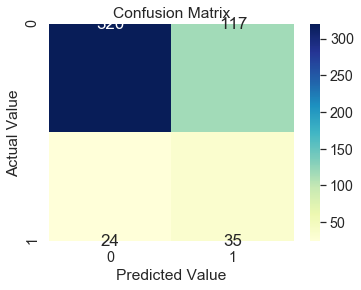

In [60]:
cm = pd.crosstab(prediction3, y_test, rownames=['Actual Value'], colnames=['Predicted Value'])

plt.figure(figsize=(5.5,4))
sns.set(context='notebook', font_scale=1.3, color_codes=True, palette='deep')
sns.heatmap(cm, annot=True, annot_kws={"size": 17}, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

#### - Omitting the Precipitation and the Rain and using the trained Logistic Regression model, we have predicted that there will be no rain for 320 days and rain only for 35 days.
#### - The model also incorrectly predicts that 117 days have no rain and 24 day have rain.

In [61]:
# Evaluation the model with cross validation

scores = cross_val_score(classifier_lr, X_train, y_train, cv=5)
scores.mean() 

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\cuong\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.7197007015972534

#### From the above prediction with Logistic Regression class,  we have achieved around 72% percent accuracy.

### Evaluating our Logistic Regression model with ROC Curve

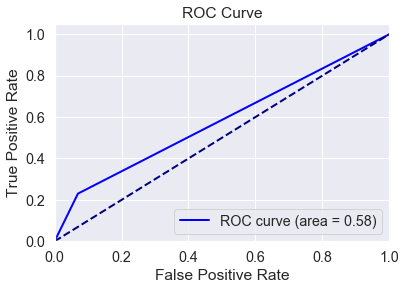

In [62]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, prediction3)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Base on the above ROC curve, area under the curve (AUC) is low. Therefore, this model has not performed well on our test data set.

## Lets build models for predicting/forecasting temperatures

## Temperature predictions

### Using Linear Regression

In [94]:
df_weather.describe()

PRECIPITATION         RAIN    TEMPAVG_F    TEMPMAX_F    TEMPMIN_F
count    1652.000000  1652.000000  1652.000000  1652.000000  1652.000000
mean        0.164122     0.303874    70.683414    80.921308    61.582930
std         0.692653     0.460068    12.453947    12.655616    13.624799
min         0.000000     0.000000    27.000000    34.000000    19.000000
25%         0.000000     0.000000    62.000000    73.000000    50.000000
50%         0.000000     0.000000    73.000000    83.000000    65.000000
75%         0.020000     1.000000    81.000000    91.000000    74.000000
max        16.070000     1.000000    90.000000   103.000000    83.000000

### Prepare data for training

In [95]:
X = df_weather['TEMPMIN_F'].values.reshape(-1,1)
y = df_weather['TEMPMAX_F'].values.reshape(-1,1)

In [96]:
# Spit the data into 70% training and 30% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Ready for Regression analysis

In [97]:
# Fitting the Linear Regression Classifier
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
# Checking the model with intercept and coefficients (slope)
# Print the intercept and coefficients

print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

intercept: [29.62011356]
slope: [[0.83187474]]


#### The Slope and Intercept are important concept of Linear Regression. From the above we get 29.6201 intercept and 0.8319 slope. This means for every one unit of change in Min Temperature, the change in Max Temperature is about 0.83%.

### Predicting the Test set results

In [99]:
y_pred = linreg.predict(X_test)

In [100]:
# Printing the prediction results
df_temp = pd.DataFrame({'Actual Temp': y_test.flatten(), 'Predicted Temp': y_pred.flatten()})
df_temp

Actual Temp  Predicted Temp
0             84       78.700723
1             75       68.718227
2             95       93.674469
3             90       91.178845
4             67       57.071980
..           ...             ...
491           78       69.550101
492           93       91.178845
493           69       77.036974
494           85       74.541350
495           83       87.851346

[496 rows x 2 columns]

### Visualize comparison results

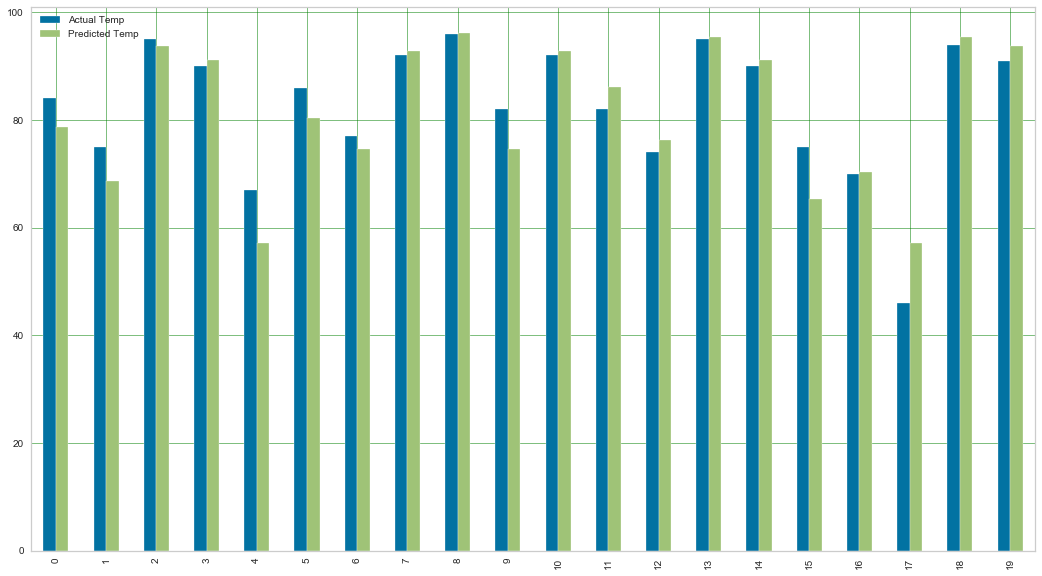

In [101]:
df_temp1 = df_temp.head(20)
df_temp1.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Our Linear Regression model is not very precise, but the predicted temperatures are close to the actual ones.
#### Base on the above bar graph, Regeression models is relatively simple straight forward and easy to clarify between the actual and predicted temperatures.

### Regression line

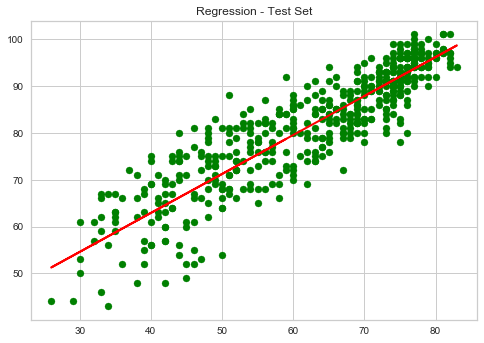

In [102]:
# Draw a Regression line on the Test Set

plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression - Test Set')
plt.show()


#### Scatter plot graph between X_test and y_test datasets and we draw a regression line.The straight red line shows our algorithm is correct. Our model looks like a good fit for this data.

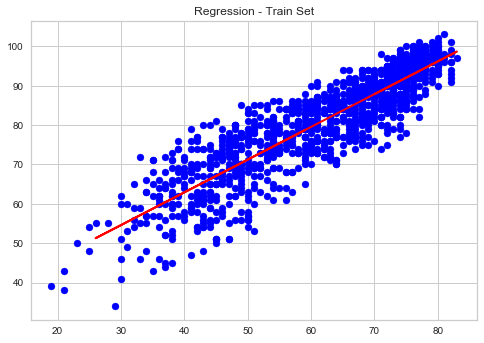

In [103]:
# # Draw a Regression line on the Train Set

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression - Train Set')
plt.show()

#### Scatter plot graph between X_train and y_train datasets and we draw a regression line.The straight red line shows our algorithm is correct.

### Evaluation metrics of our Linear Regression model

In [104]:
from sklearn import metrics
# Analyzing our model

# Calculate the coefficients
print('Coefficients: \n', linreg.coef_)

# Calculate the mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Calculate the mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

# Calculate the root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate the R-squared (or coefficient of determinationnote. 1 is a perfect prediction.
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred))

Coefficients: 
 [[0.83187474]]
Mean Absolute Error: 4.325129418794831
Mean Squared Error: 30.63132685300835
Root Mean Squared Error: 5.534557511943331
Coefficient of Determination: 0.8013689908360337


### Results:
#### - The MSE is the average of the square of the prediction errors. The larger the number, the larger is the error. We can see that the error is 30.63, so it is high. But there is not a correct value for the MSE. Of course, the lower the error, the better, and zero means the model is perfect. Since there is no correct answer, we cannot conclude that our prediction model is incorrect.
#### - The RMSE is the error rate by the square root of MSE. We can see that the RMSE is 5.53, which is about less than 15% of the 'mean' value of the percentage of all the temperature, i.e. 70.68. This means our algorithm did a decent job. It has made a fairly good prediction (We can see it in the bar plot above).
#### - The MAE is the difference between the original and predicted values extracted by the averaged absolute difference over the data. We can see that it is 4.32, and it is slightly smaller than the RMSE.
#### - The Coefficient of Determination is about 80%, which is fairly good. The higher the value the better is the model

### Lets do further performance measure on the Training and Test Data

In [105]:
from sklearn.metrics import mean_squared_error as mse

y_pred = linreg.predict(X_test)
print("Mean Squared Error on Training Data --> {}\nMean Squared Error on Test Data --> {}".format(mse(y_train, linreg.predict(X_train)), mse(y_test, y_pred)))

Mean Squared Error on Training Data --> 34.62892696482489
Mean Squared Error on Test Data --> 30.63132685300835


#### From the above performance measure, we got the mean squared errors on training and test data 34.6 and 30.6; this shows that the mean squared errors are closure between test and train datasets. This means the model tends to not overfitting the data.

### Visualizing the model with Residuals Plot - Train and Test data

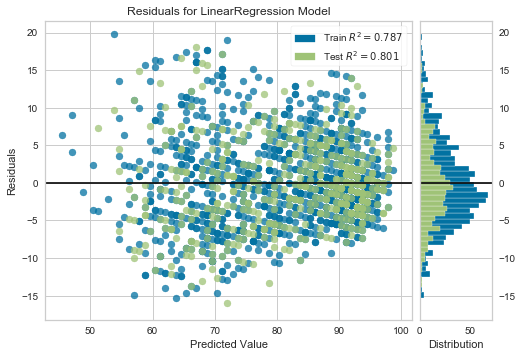

In [106]:
from yellowbrick.regressor import ResidualsPlot
# To understand it much further we plot the Residual Plot for this model.

visualizer = ResidualsPlot(linreg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

### Results:
#### From the  above residual plot, we can see that the points are not circulate and cramp around the horizontal axis. Rather, they are randomly scatter and spread out. This seems to indicate that our Linear Regression model is performing quite well.

### Lets do a Deep Learning Neural Networks for temperature prediction

### Recurrent Neural Networks LSTM -- Time Series predicting (forecasting)

In [76]:
# Use Temperature data from Jan-01-2016 to July-09-2020

df_temp = df_weather[['TEMPAVG_F']]
df_temp.index = pd.to_datetime(df_weather[['DATE']].stack(), format='%m%d%y', errors='ignore')

df_temp.head()

TEMPAVG_F
1/1/2016         48
1/2/2016         47
1/3/2016         49
1/4/2016         49
1/5/2016         45

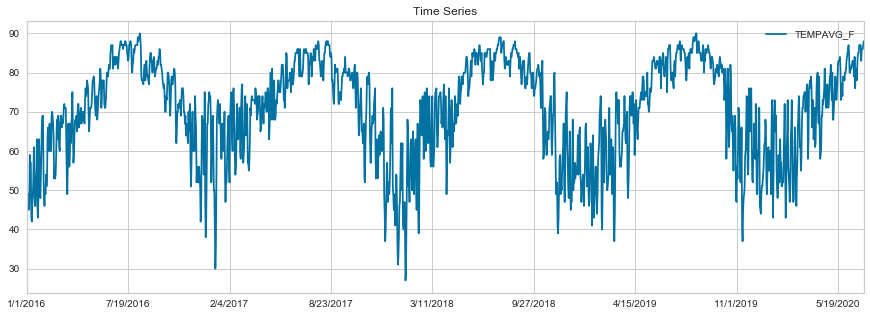

In [77]:
# Plot the Time Series for the Temperature
df_temp.plot(figsize=(15,5), title='Time Series')

### Prepare data for training

In [86]:
# Split into training and test data

train_size = int(len(df_temp) * 0.8)
test_size = len(df_temp) - train_size
train, test = df_temp.iloc[0:train_size], df_temp.iloc[train_size:len(df_temp)]
print(len(train), len(test))

1321 331


In [87]:
# Scaling the data with MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(train[['TEMPAVG_F']])

train['TEMPAVG_F'] = scaler.transform(train[['TEMPAVG_F']])
test['TEMPAVG_F'] = scaler.transform(test[['TEMPAVG_F']])

C:\cuong\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\cuong\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Create sequences

In [88]:
# Creating sequences combining with time_steps

def create_sequences(X, y, time_steps=1):
    X_output, y_output = [], []
    for i in range(len(X) - time_steps):
        value = X.iloc[i:(i + time_steps)].values
        X_output.append(value)        
        y_output.append(y.iloc[i + time_steps])
    return np.array(X_output), np.array(y_output)

In [89]:
# Use a history of 5 time steps to make our sequences

time_steps = 5

X_train, y_train = create_sequences(train, train.TEMPAVG_F, time_steps)
X_test, y_test = create_sequences(test, test.TEMPAVG_F, time_steps)

print(X_train.shape, y_train.shape)

(1316, 5, 1) (1316,)


### Build a model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Train on 1316 samples, validate on 326 samples
Epoch 1/50
1316/1316 [==============================] - 3s 2ms/sample - loss: 0.0421 - val_loss: 0.0155
Epoch 2/50
1316/1316 [==============================] - 1s 610us/sample - loss: 0.0145 - val_loss: 0.0171
Epoch 3/50
1316/1316 [==============================] - 1s 523us/sample - loss: 0.0144 - val_loss: 0.0183
Epoch 4/50
1316/1316 [==============================] - 1s 654us/sample - loss: 0.0142 - val_loss: 0.0184
Epoch 5/50
1316/1316 [==============================] - 1s 613us/

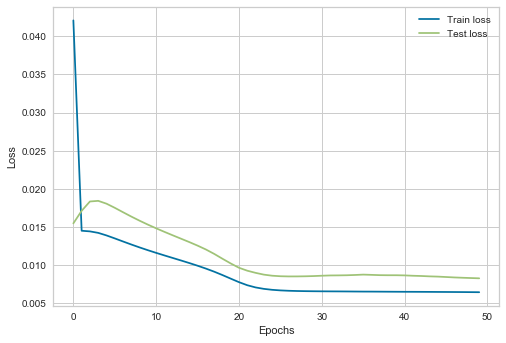

In [90]:
# Use the LSTM layer in a sequential model to make temperature predictions.

backend.clear_session()

model = keras.Sequential()

model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(0.001))
model.summary()

# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=16, 
                    validation_data = (X_test, y_test),
                    verbose=1, 
                    shuffle=False)

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

#### From the above plot, after ~ 25 epochs, the model is pretty much done of learning.

### Model prediction

In [91]:
y_pred = model.predict(X_test)

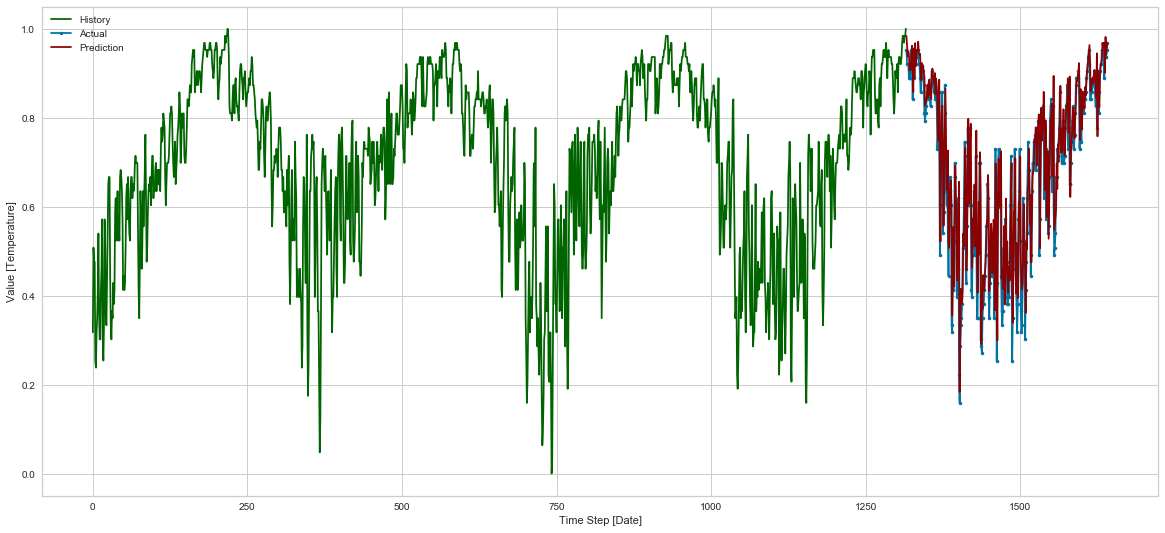

In [92]:
# Plot the predictions over the true (actual) values from the Time Series.

plt.figure(figsize=(20, 9))
plt.plot(np.arange(0, len(y_train)), y_train, 'darkgreen', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'darkred', label="Prediction")
plt.ylabel('Value [Temperature]')
plt.xlabel('Time Step [Date]')
plt.legend()
plt.show()

#### From the above plot, the predictions over the true (actual) values from the Time Series look very good.

### Results:
#### - Looking at the visualization plot, Time Series predicting with LSTM seems to be doing a great job of capturing the general pattern of the data. It does capture random fluctuations, which is good.
#### - The model was able to detect pattern over a period of times. It has picked up the annual trend of increasing value (temperature) as summer and decreasing temperature as winter.
#### - The graph patterns from our predicted temperature are closed to the actual. Our model did still indicate overall trends such as going up or down. The prediction has taught me that the LSTMs can be very effective in times series predicting/forecasting.